In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import visualkeras as vs

import numpy as np
import pandas as pd
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [2]:
df = pd.read_csv("C:/Users/Esrak/Desktop/CSE422 ANN/Rain Prediction/weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['Year']=df['Date'].dt.year

In [5]:
x = input("Please enter the city:")
news= df[df["Location"] == x]

KeyboardInterrupt: Interrupted by user

In [ ]:
news

In [ ]:
y = int(input("Please enter the day:"))
newsy= news[news["Day"] == y]

In [ ]:
newsy

In [ ]:
z = int(input("Please enter the month:"))
data= newsy[newsy["Month"] == z]

In [6]:
data = df

In [7]:
x = data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,23,24,25]].values
y = data.iloc[:,[21,22]].values

In [8]:
y

array([['No', 'No'],
       ['No', 'No'],
       ['No', 'No'],
       ...,
       ['No', 'No'],
       ['No', 'No'],
       ['No', nan]], dtype=object)

# Cleaning missing data

In [11]:
imputer = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')

In [12]:
x = imputer.fit_transform(x)
y = imputer.fit_transform(y)

In [13]:
y

array([['No', 'No'],
       ['No', 'No'],
       ['No', 'No'],
       ...,
       ['No', 'No'],
       ['No', 'No'],
       ['No', 'No']], dtype=object)

# Encoding Dataset
Converting string data to numerical values so I can process the data

In [14]:
col_obj = data.select_dtypes(include = 'object').columns

In [15]:
le1 = LabelEncoder()
x[:,0] = le1.fit_transform(x[:,0])
le2 = LabelEncoder()
x[:,4] = le2.fit_transform(x[:,4])
le3 = LabelEncoder()
x[:,6] = le3.fit_transform(x[:,6])
le4 = LabelEncoder()
x[:,7] = le4.fit_transform(x[:,7])
le5 = LabelEncoder()
x[:,8] = le5.fit_transform(x[:,8])
le6 = LabelEncoder()
x[:,9] = le6.fit_transform(x[:,9])
le7 = LabelEncoder()
x[:,-1] = le7.fit_transform(x[:,-1])

In [73]:
le8 = LabelEncoder()
y[:,-1] = le8.fit_transform(y[:,-1])
le9 = LabelEncoder()
y[:,-2] = le9.fit_transform(y[:,-2])

In [74]:
x[:, 8]

array([ 1.32876628, -0.2213385 ,  1.32876628, ...,  0.44299212,
        0.66443566, -1.10711265])

In [75]:
print(y)

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Feature Scaling

In [76]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [77]:
print(x)

[[-1.53166617  0.19132753 -0.04135977 ...  1.6340755  -1.67284386
  -1.87957524]
 [-1.53166617 -0.75105231  0.26874452 ...  1.6340755  -1.55913977
  -1.87957524]
 [-1.53166617  0.11279588  0.35331842 ...  1.6340755  -1.44543568
  -1.87957524]
 ...
 [ 1.20928479 -1.06517892  0.52246622 ... -0.11659932  0.8286461
   1.66697818]
 [ 1.20928479 -0.68822699  0.53656187 ... -0.11659932  0.94235019
   1.66697818]
 [ 1.20928479  0.42692249 -0.45013361 ... -0.11659932  1.05605428
   1.66697818]]


# Splitting Data to Train and Test Sets

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 42)

In [79]:
x_train

array([[-0.75857743,  1.57348463,  1.55144865, ..., -0.11659932,
         0.26012566,  0.87885519],
       [-1.1802622 ,  0.74104911,  1.15677045, ..., -0.99193674,
        -0.64950706, -0.30332928],
       [ 0.0145113 , -0.53116368, -0.32327277, ...,  0.75873809,
         1.62457473,  1.27291668],
       ...,
       [ 0.29563447, -0.71963965, -0.21050757, ..., -0.99193674,
         0.14642157, -0.30332928],
       [-0.61801585, -0.53116368, -1.1831074 , ..., -0.11659932,
         0.8286461 ,  0.4847937 ],
       [ 0.50647685,  0.56827947,  2.45357023, ..., -0.99193674,
        -0.42209888, -0.30332928]])

In [80]:
x_train = np.asarray(x_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

In [81]:
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [82]:
for i in num_cols:
    print(i, data[i].isnull().sum())

MinTemp 0
MaxTemp 0
Rainfall 0
Evaporation 0
Sunshine 0
WindGustSpeed 0
WindSpeed9am 0
WindSpeed3pm 0
Humidity9am 0
Humidity3pm 0
Pressure9am 0
Pressure3pm 0
Cloud9am 0
Cloud3pm 0
Temp9am 0
Temp3pm 0


In [83]:
for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [84]:
for i in num_cols:
    print(i, data[i].isnull().sum())

MinTemp 0
MaxTemp 0
Rainfall 0
Evaporation 0
Sunshine 0
WindGustSpeed 0
WindSpeed9am 0
WindSpeed3pm 0
Humidity9am 0
Humidity3pm 0
Pressure9am 0
Pressure3pm 0
Cloud9am 0
Cloud3pm 0
Temp9am 0
Temp3pm 0


In [85]:
features = data.drop(columns=['Pressure9am', 'Pressure3pm','Year'])

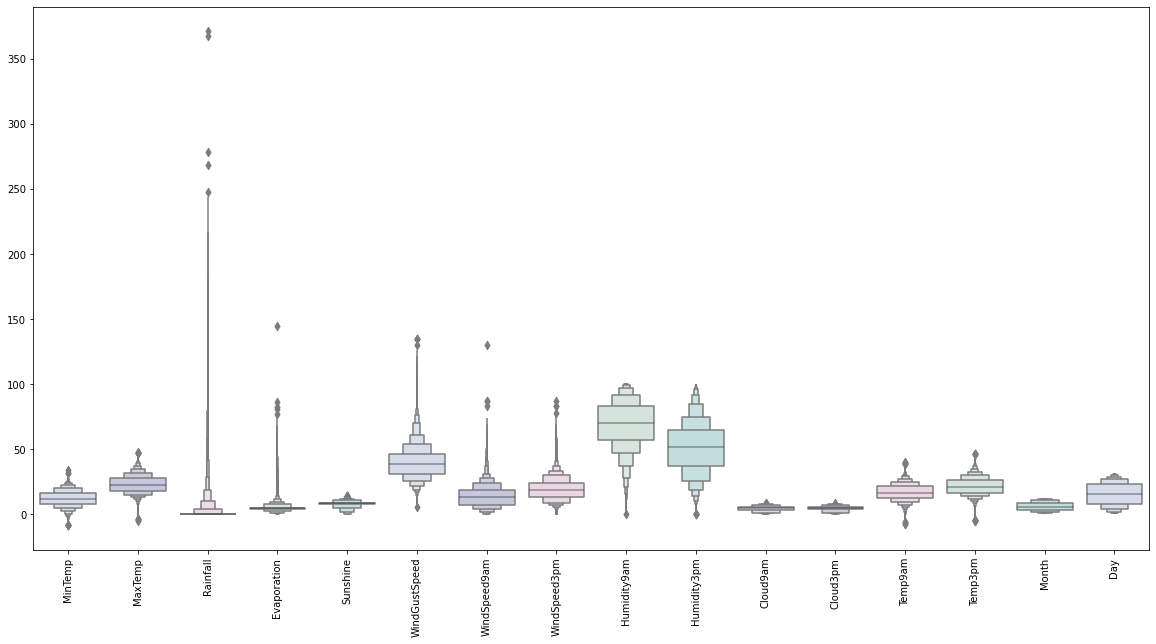

In [86]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

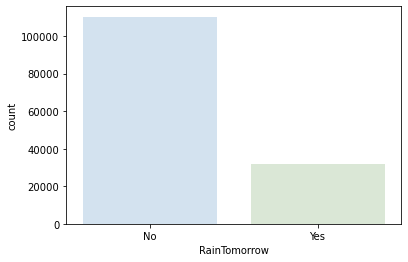

In [87]:
cols= ["#cfe2f3","#d9ead3"]
sns.countplot(x= data["RainTomorrow"], palette= cols)

# Training Models

In [88]:
yes = data['RainTomorrow'].value_counts()['Yes']

In [89]:
no = data['RainTomorrow'].value_counts()['No']

In [90]:
no

110316

In [91]:
#Early stopping
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 23))

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.add(Flatten())

opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(x_train, y_train, batch_size = 26, epochs = 30, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/30
3133/3133 [==============================] - 3s 963us/step - loss: 0.4685 - accuracy: 0.7812 - val_loss: 0.3764 - val_accuracy: 0.7812
Epoch 2/30
3133/3133 [==============================] - 3s 939us/step - loss: 0.3989 - accuracy: 0.7812 - val_loss: 0.3555 - val_accuracy: 0.7812
Epoch 3/30
3133/3133 [==============================] - 3s 917us/step - loss: 0.3829 - accuracy: 0.8532 - val_loss: 0.3403 - val_accuracy: 0.8698
Epoch 4/30
3133/3133 [==============================] - 3s 911us/step - loss: 0.3708 - accuracy: 0.8678 - val_loss: 0.3309 - val_accuracy: 0.8749
Epoch 5/30
3133/3133 [==============================] - 3s 930us/step - loss: 0.3636 - accuracy: 0.8703 - val_loss: 0.3253 - val_accuracy: 0.8759
Epoch 6/30
3133/3133 [==============================] - 3s 915us/step - loss: 0.3589 - accuracy: 0.8701 - val_loss: 0.3212 - val_accuracy: 0.8767
Epoch 7/30
3133/3133 [==============================] - 3s 908us/step - loss: 0.3545 - accuracy: 0.8704 - val_loss: 0.3200 -

In [93]:
vs.layered_view(model)

In [94]:
result

array([[0.62964094],
       [0.00216795],
       [0.21068755],
       ...,
       [0.62964094],
       [0.00521091],
       [0.54348993]], dtype=float32)

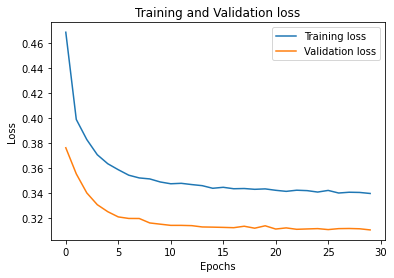

In [95]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

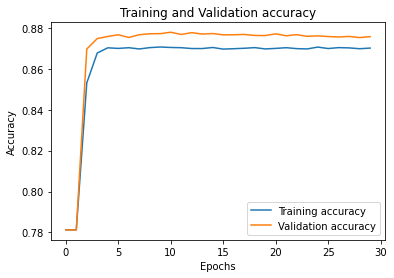

In [96]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
print(classification_report(y_test, y_predicted))